## Lista 1 - Aprendizagem Automática

**Davi Braga Gomes - 0396905**

### 1) Regressão Linear Univariada

- Carregue os dados contidos no arquivo _ex1data1.txt_. O arquivo contem 97 linhas e 2 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo onde a variável da coluna 2 será estimada a partir da variável da coluna 1.

    - **Apresentar:** Figura com os dados.
    - **Comentários**: Um modelo de regressão linear parece ser adequado para os dados em questão? Comente.
    


- Implemente o algoritmo do gradiente descendente estocástico para encontrar os coeficientes da regressão. Para este algoritmo utilize **α = 0.001** e utilize **1000 épocas** de treinamento. Para cada época de treinamento, calcule o erro quadrático médio (EQM) . Plote o gráfico “épocas x EQM”.

    - **Apresentar**: Valor final dos coeficientes e gráfico épocas x EQM.
    - **Comentários**: Através do gráfico “épocas x EQM” é possível verificar que o algoritmo está “aprendendo” ? Comente.



### Carregando os dados do arquivo:

In [1]:
import numpy as np

def load_data(file_name, delimiter_):
    return np.genfromtxt(file_name, delimiter = delimiter_)

data = load_data('ex1data1.txt', ',')

### Figura com os dados:

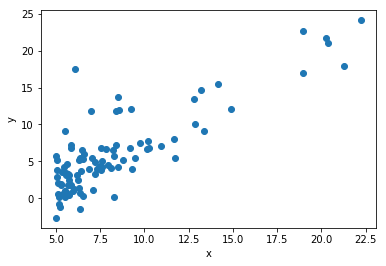

In [2]:
import matplotlib.pyplot as plt

plt.plot(data[:, :-1], data[:, -1], 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Adequação ao modelo linear:

O modelo de regressão linear parece adequado pois, observando o gráfico, é possível perceber que há uma considerável correlação positiva entre entre X e Y.

### Algoritmo do gradiente descendente estocástico 

In [18]:
def get_x(data):
    X = data[:, :-1]
    m = X.shape[0]
    ones = np.ones((m, 1))
    return np.concatenate((ones, X), axis = 1)

def get_y(data):
    y = data[:, -1]
    y = np.array([y])
    return y.T

def cost(X, w, y):
    m = X.shape[0]
    return (1.0/(2.0*m))*np.sum((X.dot(w) - y)**2)

def to_2d(w):
    return np.reshape(w, (-1,1))

def gradient_descent(data, alpha, n_epochs):
    w = np.random.rand(data.shape[1], 1)
    costs = []
    for i in range(n_epochs):
        np.random.shuffle(data)
        for i in range(len(data)):
            X = get_x(data)
            Y = get_y(data)
            error = (X[i].dot(w) - Y[i])
            w = w - to_2d(alpha*error*X[i])
        costs.append(cost(get_x(data), w, get_y(data)))
    return (w,costs)

(w, costs) = gradient_descent(data, 0.001, 1000)

### Valores finais dos pesos:

In [19]:
print w

[[-3.91066478]
 [ 1.11245383]]


### Gráfico “Epoca x EQM”:

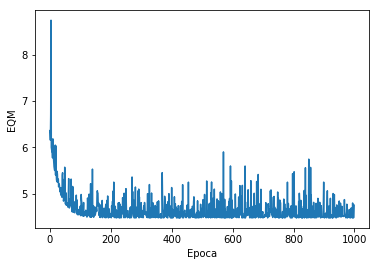

In [20]:
plt.plot(list(range(len(costs))), costs)
plt.xlabel('Epoca')
plt.ylabel('EQM')
plt.show()

O gráfico possui uma tendência decrescente e mostra que o erro quadrático médio estava acima de 8 na primeira época e que seu valor final ficou abaixo de 4. Portanto, podemos concluir que, apesar de vários picos de piora decorrentes da natureza estocástica do algoritmo, houve sim aprendizado.

## 2) Regressão Linear Múltipla

- Carregue os dados contidos no arquivo _ex1data2.txt_. O arquivo contem 47 linhas e 3 colunas de dados. Cada coluna se refere a uma variável. Neste problema, deve-se desenvolver um modelo onde a variável da coluna 3 será estimada a partir das variáveis das coluna 1 e 2. Os dados apresentados referem-se a um problema de estimação do preço de casas. As variáveis 1 e 2 são a área da casa e o número de quartos, respectivamente. A variável 3 é o preço do imóvel.
- Implemente o algoritmo do gradiente descendente estocástico para encontrar os coeficientes da regressão. Para este algoritmo utilize **α = 0.01** e utilize **100 épocas**  de treinamento. Para cada época de treinamento, calcule o erro quadrático médio (EQM) . Plote o gráfico “épocas x EQM”.

    - **Apresentar:** Valor final dos coeficientes e gráfico épocas x EQM.
    - **Comentários**: Através do gráfico “épocas x EQM” é possível verificar que o algoritmo está “aprendendo” ? Comente.
    


- Encontre os coeficientes da regressão utilizando o método dos mínimos quadrados.

    - **Apresentar**: Valor final dos coeficientes.
    - **Comentários**: Os valores obtidos pelos dois métodos são iguais? Comente.

### Carregando os dados do arquivo:

In [21]:
data = load_data('ex1data2.txt', ' ')

### Rodando o gradiente descendente estocástico:

In [42]:
(w, costs) = gradient_descent(data, 0.01, 100)

### Valores finais dos pesos:

In [43]:
print w

[[ 0.82780972]
 [ 1.38745975]
 [-0.04780498]]


### Gráfico “Epoca x EQM”:

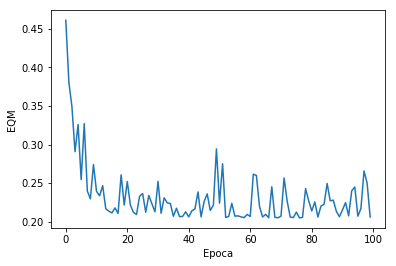

In [44]:
plt.plot(list(range(len(costs))), costs)
plt.xlabel('Epoca')
plt.ylabel('EQM')
plt.show()

O gráfico possui uma tendência decrescente e mostra que o erro quadrático médio estava acima de 0.45 na primeira época e que seu valor final ficou próximo de 0.25. Portanto, podemos concluir que, apesar de vários picos de piora decorrentes da natureza estocástica do algoritmo, houve sim aprendizado.